In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
T = 100
wn = np.random.randn(T)

In [ ]:
plt.figure(figsize=(5,1))
plt.plot(wn)
plt.xlabel('time')

In [2]:
lt = np.arange(0, 10, 10/T)
plt.figure(figsize=(5,1))
plt.plot(wn + lt)
plt.xlabel('time')

NameError: name 'np' is not defined

In [3]:
wn = np.random.randn(T//2)
w2 = 10*np.random.randn(T//2)
plt.figure(figsize=(5,1))
plt.plot(np.concatenate([wn, w2]))
plt.xlabel('time')

NameError: name 'np' is not defined

Text(0.5, 0, 'time')

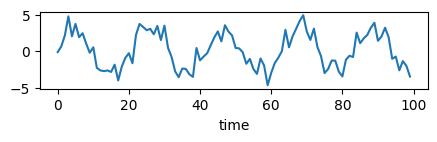

In [63]:
wn = np.random.randn(T)
lt = np.arange(0, 30, 30/T)
ws = 3*np.sin(lt)

plt.figure(figsize=(5,1))
plt.plot(wn + ws)
plt.xlabel('time')

Text(0.5, 0, 'time')

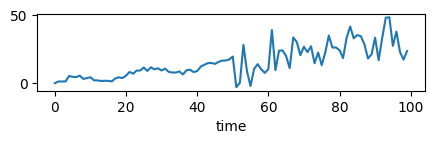

In [64]:
wn = np.random.randn(T//2)
w2 = 10*np.random.randn(T//2)
wn = np.concatenate([wn, w2])

lt = np.arange(0, 30, 30/T)

tsin = np.arange(0, 30, 30/T)
ws = 3*np.sin(tsin)

plt.figure(figsize=(5,1))
plt.plot(wn + lt + ws)
plt.xlabel('time')

# Statistical Tests for Stationarity

(-13.919993959552379, 5.317169524357745e-26, 2, 497, {'1%': -3.4435761493506294, '5%': -2.867372960189225, '10%': -2.5698767442886696}, 1319.2659439157453)


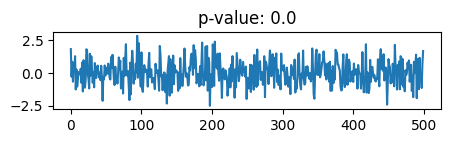

In [65]:
from statsmodels.tsa.stattools import adfuller

mu, std = 0.0, 1.0
T = 500
ts = np.random.normal(mu, std, size=T)

plt.figure(figsize=(5,1))
plt.plot(ts)
plt.title("p-value: {}".format(round(adfuller(ts)[1], 15)))
print(adfuller(ts))

(-0.5803599888996017, 0.87535839683394, 12, 487, {'1%': -3.443849184997939, '5%': -2.8674931065091105, '10%': -2.569940776113236}, 1360.1133709025062)


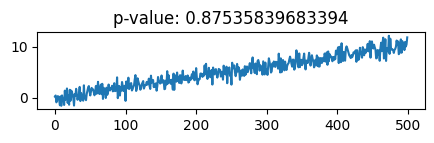

In [66]:
ts = np.random.normal(mu, std, size=T)
lt = np.arange(0, 10, 10/T)
ts = ts + lt

plt.figure(figsize=(5,1))
plt.plot(ts)
plt.title("p-value: {}".format(round(adfuller(ts)[1], 15)))
print(adfuller(ts))

Text(0.5, 1.0, 'p-value: 0.92628291356479')

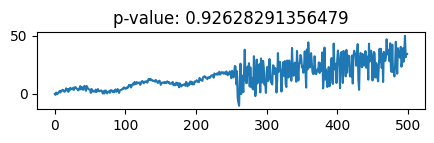

In [67]:
ts1 = np.random.randn(T//2)
ts2 = 10*np.random.randn(T//2)
ts = np.concatenate([ts1, ts2])

lt = np.arange(0, 30, 30/T)

tsin = np.arange(0, 30, 30/T)
tseason = 3*np.sin(tsin)

ts = ts + lt + tseason
plt.figure(figsize=(5,1))
plt.plot(ts)
plt.title("p-value: {}".format(round(adfuller(ts)[1], 15)))

Text(0.5, 1.0, 'p-value: 0.001965070394838')

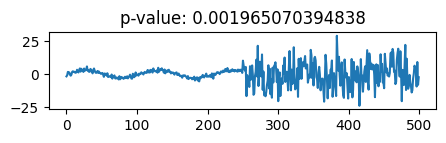

In [68]:
ts1 = np.random.randn(T//2)
ts2 = 10*np.random.randn(T//2)
ts = np.concatenate([ts1, ts2])

tsin = np.arange(0, 30, 30/T)
tseason = 3*np.sin(tsin)

ts = ts + tseason
plt.figure(figsize=(5,1))
plt.plot(ts)
plt.title("p-value: {}".format(round(adfuller(ts)[1], 15)))

# TS Decomposition

C:\Users\w-32\AppData\Local\Temp\ipykernel_13216\1979889112.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_set = pd.read_csv('../datasets/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])


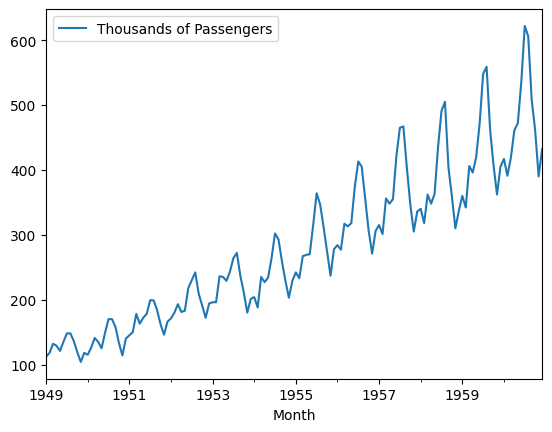

In [69]:
import pandas as pd
# import and visualize data
data_set = pd.read_csv('../datasets/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])
data_set.plot()
plt.show()

### Additive decomposition

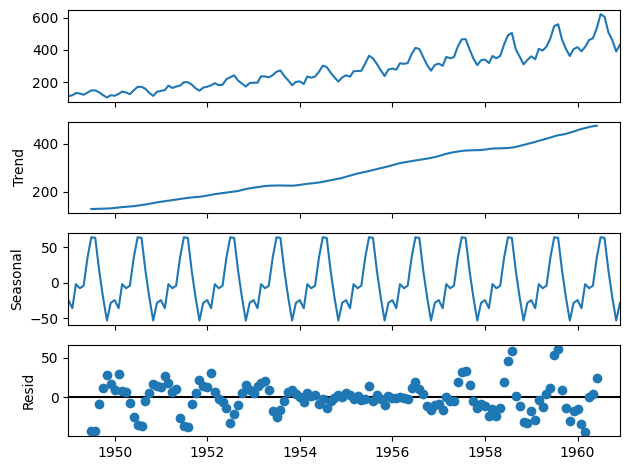

In [21]:
add_decomposition = sm.tsa.seasonal_decompose(data_set, model='additive')
x = add_decomposition.plot()

### Multiplicative decomposition

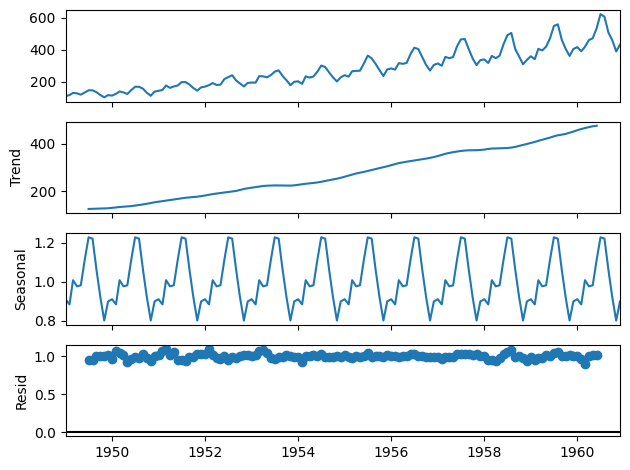

In [22]:
add_decomposition = sm.tsa.seasonal_decompose(data_set, model='multiplicative')
x = add_decomposition.plot()

# Detrending via difference

Text(0.5, 0, 'time')

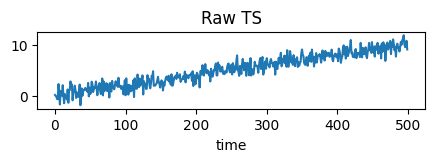

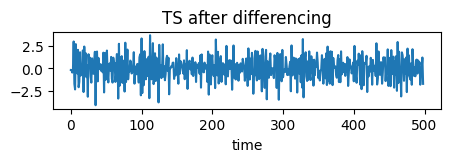

In [70]:
wn = np.random.randn(T)
lt = np.arange(0, 10, 10/T)

wnlt = wn + lt
plt.figure(figsize=(5,1))
plt.plot(wnlt)
plt.title("Raw TS")
plt.xlabel('time')

plt.figure(figsize=(5,1))
plt.plot(wnlt[1:] - wnlt[:-1]) # \hat{y}^t = y^t - y^{t-1}
plt.title("TS after differencing")
plt.xlabel('time')

# Remove Seasonality - Centered Moving Average

In [71]:
data_set = pd.read_csv('../datasets/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"])
data_set['moy'] = data_set["Month"].dt.month
data_set['year'] = data_set["Month"].dt.year 
data_set.set_index("Month", inplace=True)

C:\Users\w-32\AppData\Local\Temp\ipykernel_13216\2627329622.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_set = pd.read_csv('../datasets/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"])


In [72]:
len(data_set)

144

In [73]:
# compute the centred moving average and the moving average
data_set['centred-MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=True).mean()
data_set['MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=False).mean()

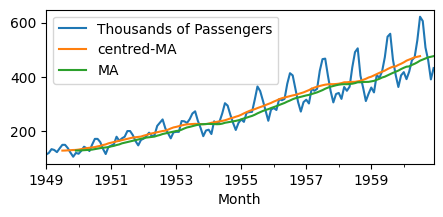

In [74]:
# visualize the original data and the two moving averages
data_set[["Thousands of Passengers","centred-MA","MA"]].plot(figsize=(5,2))
plt.show()

In [75]:
data_set['detrended'] = data_set['Thousands of Passengers']-data_set['centred-MA']

<Axes: xlabel='Month'>

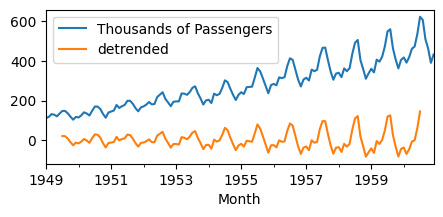

In [76]:
data_set[["Thousands of Passengers","detrended"]].plot(figsize=(5,2))

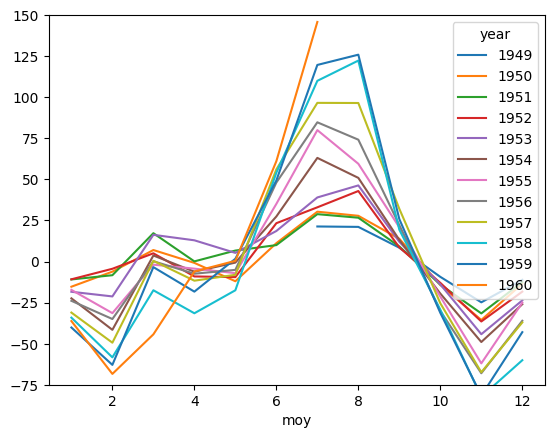

In [77]:
moys = data_set.pivot(index='moy', columns='year', values='detrended')
ax = moys.plot()
ax.set_ylim([-75,150])
plt.show()

Once we obtain the detrended time series, we group the data by the month of the year (moy) and compute the mean:

In [78]:
subsequence = data_set[["detrended","moy"]].groupby(["moy"]).mean()
subsequence.rename(columns={"detrended": "season"},inplace=True)

In [79]:
data_set[["detrended","moy"]]

,detrended,moy
Month,,
1949-01-01,NaN,1
1949-02-01,NaN,2
1949-03-01,NaN,3
1949-04-01,NaN,4
1949-05-01,NaN,5
...,...,...
1960-08-01,NaN,8
1960-09-01,NaN,9
1960-10-01,NaN,10


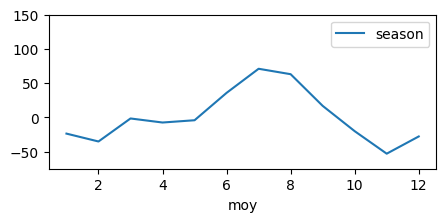

In [80]:
ax = subsequence.plot(figsize=(5,2))
ax.set_ylim([-75,150])
plt.show()

In [81]:
mean = subsequence.mean()

In [82]:
subsequence["season"] = subsequence["season"]-float(mean)

C:\Users\w-32\AppData\Local\Temp\ipykernel_13216\883783989.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  subsequence["season"] = subsequence["season"]-float(mean)


After obtaining one seasonal component, we create our seasonal time series by duplicating for the number of cycles present in the data (in this case 12):

In [83]:
seasonal_component = subsequence
for i in range(0,11):
    seasonal_component = pd.concat([seasonal_component,subsequence])
seasonal_component = seasonal_component.reset_index()

<Axes: >

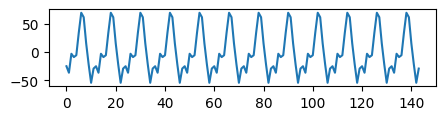

In [84]:
seasonal_component["season"].plot(figsize=(5,1))

In [85]:
data_set['deseasoned'] = data_set['Thousands of Passengers'].values - seasonal_component["season"].values
data_set['deseasoned & detrended'] = data_set['detrended'].values - seasonal_component["season"].values

<Axes: xlabel='Month'>

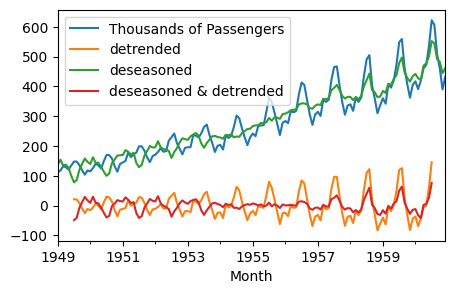

In [86]:
data_set[["Thousands of Passengers","detrended",'deseasoned', 'deseasoned & detrended']].plot(figsize=(5,3))

In [87]:
data_set['detrended'].mean(), data_set['deseasoned & detrended'].mean()

(1.6647869674185456, 1.1392571548821546)

# Exponential Smoothing

In [88]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# function to evaluate the models
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 / len(y_true)

def evaluate(y_true, y_pred):
    print("MAE:",mae(y_true, y_pred))
    print("MSE:", mse(y_true, y_pred))
    print("RMSE:", np.sqrt(mse(y_true, y_pred)))
    print("MAPE:", mape(y_true, y_pred))

split train and test TS

In [89]:
data_set = pd.read_csv('../datasets/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])

train = data_set[:'1957-01-01'].copy().rename(columns={"Thousands of Passengers": "train"})
test = data_set['1957-01-02':].copy().rename(columns={"Thousands of Passengers": "test"})

C:\Users\w-32\AppData\Local\Temp\ipykernel_13216\4136467726.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_set = pd.read_csv('../datasets/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])


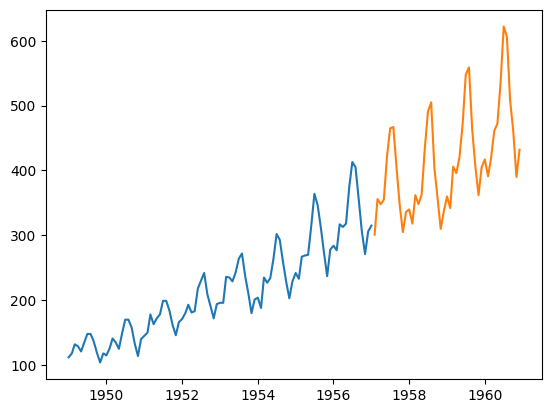

In [90]:
plt.plot(train)
plt.plot(test)

persistent model ($x_t = x_{t-1}$)

In [91]:
test['Persistent'] = test['test'].shift(1)
evaluate(test['test'][1:], test['test'].shift(1)[1:])

MAE: 41.28260869565217
MSE: 2402.282608695652
RMSE: 49.01308609642584
MAPE: 0.21469523278785677


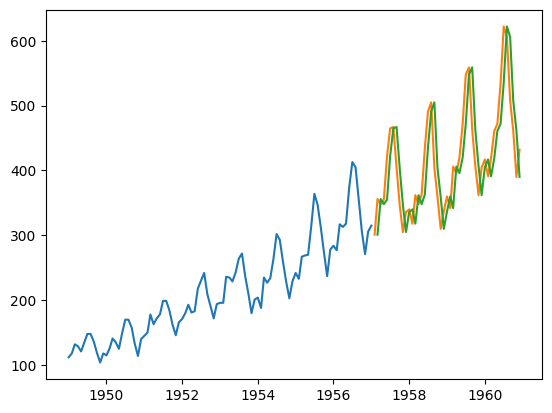

In [92]:
plt.plot(train)
plt.plot(test)

In [94]:
fitHolt = Holt(train['train']).fit(smoothing_level = 0.2,smoothing_trend = 0.05)
test['Holt'] = fitHolt.forecast(len(test))
evaluate(test['test'], test['Holt'])

MAE: 51.68541558444403
MSE: 4765.143213045756
RMSE: 69.03001675391478
MAPE: 0.2476551681101014


C:\Users\w-32\mambaforge\envs\791aa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\w-32\mambaforge\envs\791aa\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


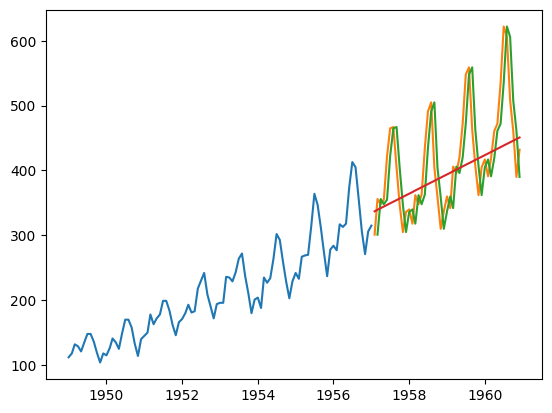

In [95]:
plt.plot(train)
plt.plot(test)

In [96]:
fitTES = ExponentialSmoothing(train['train'] ,seasonal_periods=12 ,trend='add', seasonal='add',use_boxcox=True,initialization_method="estimated").fit()
test['Holt-Winters'] = fitTES.forecast(len(test))

evaluate(test['test'], test['Holt-Winters'])

C:\Users\w-32\mambaforge\envs\791aa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 37.728806924489895
MSE: 2004.9268737475547
RMSE: 44.77640979073193
MAPE: 0.19737030264381833


<Axes: xlabel='Month'>

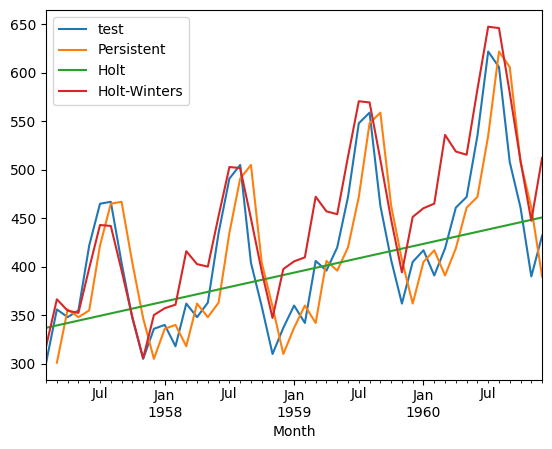

In [97]:
test.plot()